In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [2]:
df = pd.read_csv("../Future Skills Training/DataSets/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

In [5]:
df = df[["Annual_Income_(k$)","Spending_Score"]]
df.head()

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
# min points => Dim + 1 => 2 + 1 = 3

In [7]:
# k distance plot 

from sklearn.neighbors import NearestNeighbors 

n = NearestNeighbors(n_neighbors = 2)

In [8]:
n_fit = n.fit(df)

In [9]:
distance,_ = n_fit.kneighbors(df)

In [10]:
distance = np.sort(distance, axis = 0)

In [11]:
distance = distance[:,1]

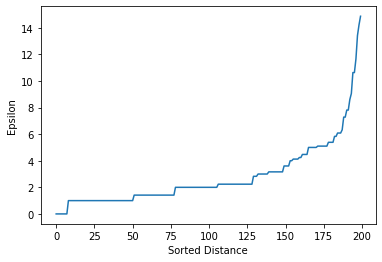

In [12]:
plt.plot(distance)
plt.xlabel("Sorted Distance")
plt.ylabel("Epsilon")
plt.show()

In [13]:
# from graph Epsilon = 5

In [14]:
from sklearn.cluster import DBSCAN 

model = DBSCAN(eps = 5, min_samples = 3)

model.fit(df)

DBSCAN(eps=5, min_samples=3)

In [15]:
model.labels_

array([-1,  1,  0,  1, -1,  1,  0, -1,  0,  1,  2, -1,  2,  1,  2,  1,  3,
       -1, -1, -1,  3,  4, -1,  4,  5, -1,  3, -1,  3, -1, -1,  4, -1, -1,
        5, -1,  5,  4, -1,  4, -1, -1, -1,  6, -1,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  7, -1,  8, -1,  7,  9,  8,  9,  8, -1,  8,  9,  7,
        9,  8,  9,  8,  9,  7, 10,  7,  9,  7, 10,  8,  9,  7,  9,  7,  9,
        8,  9,  7,  9,  8,  9,  8, 10,  7,  9,  7, -1, -1, -1, -1, -1, -1,
       11, -1, 11, -1, 11, -1, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

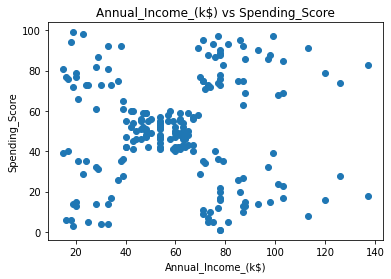

In [16]:
plt.scatter(df["Annual_Income_(k$)"],df["Spending_Score"])
plt.xlabel("Annual_Income_(k$)")
plt.ylabel("Spending_Score")
plt.title("Annual_Income_(k$) vs Spending_Score")
plt.show()

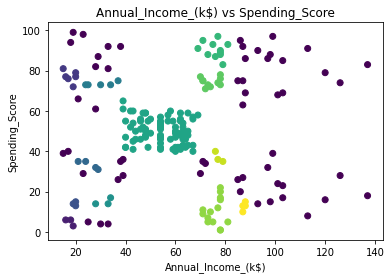

In [17]:
plt.scatter(df["Annual_Income_(k$)"],df["Spending_Score"], c = model.labels_)
plt.xlabel("Annual_Income_(k$)")
plt.ylabel("Spending_Score")
plt.title("Annual_Income_(k$) vs Spending_Score")
plt.show()

# Cluster Dataset

In [18]:
df = pd.read_csv("../Future Skills Training/DataSets/cluster_data.csv")

In [19]:
df.head()

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181


In [20]:
df.shape

(2300, 2)

In [21]:
df.columns

Index(['0', '1'], dtype='object')

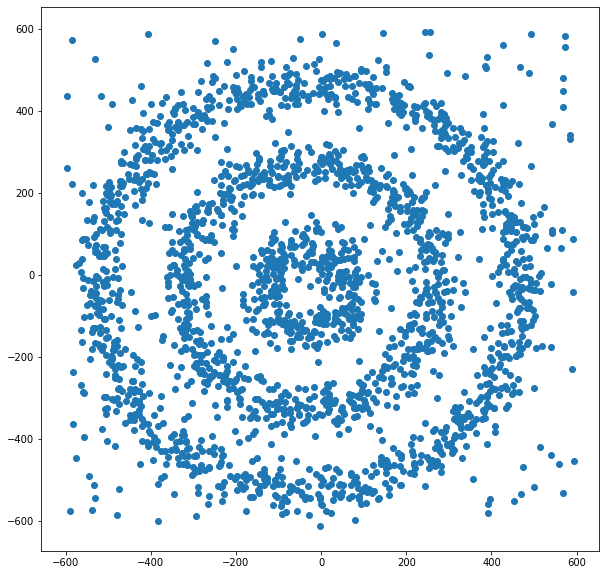

In [22]:
plt.figure(figsize = (10,10))
plt.scatter(df['0'], df['1'])
plt.show()

### K Means

In [23]:
from sklearn.cluster import KMeans

In [24]:
model = KMeans(n_clusters = 4)
model.fit(df)
centroid = model.cluster_centers_

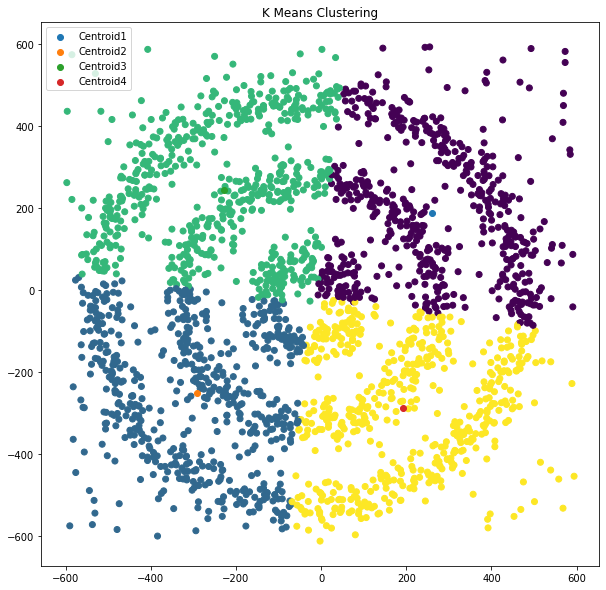

In [25]:
plt.figure(figsize = (10,10))
plt.scatter(df["0"], df["1"], c = model.labels_)
for i in range(centroid.shape[0]):
    plt.scatter(centroid[i][0], centroid[i][1], label = "Centroid"+str(i+1))
plt.title("K Means Clustering")
plt.legend()
plt.show()

### Hierarchical Clustering

In [ ]:
# Dendrogram for no. k 

plt.figure(figsize = (10, 10))

from scipy.cluster import hierarchy 

den = hierarchy.dendrogram(hierarchy.linkage(df, method = "ward"))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model = AgglomerativeClustering(n_clusters = 3)
model.fit(df)

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(df['0'], df['1'], c = model.labels_)
plt.title("Hierarchical Agglomerative Clustering")
plt.show()

### DBSCAN

In [ ]:
# k distance plot 
from sklearn.neighbors import NearestNeighbors 
n = NearestNeighbors(n_neighbors = 2)

n_fit = n.fit(df)

distance,_ = n_fit.kneighbors(df)

distance = np.sort(distance, axis = 0)

distance = distance[:,1]

In [ ]:
plt.plot(distance)
plt.xlabel("Sorted Distance")
plt.ylabel("Epsilon")
plt.show()

In [ ]:
# from graph Epsilon = 30

from sklearn.cluster import DBSCAN 
model = DBSCAN(eps = 30, min_samples = 3)
model.fit(df) 

model.labels_

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(df["0"],df["1"])
plt.xlabel("0")
plt.ylabel("1")
plt.title("0 vs 1")
plt.show()

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(df["0"],df["1"], c = model.labels_)
plt.xlabel("0")
plt.ylabel("1")
plt.title("DBSCAN Clustering")
plt.show()